# 서울격자데이터 해보기


# 데이터 불러오기

## 100M 격자 데이터 geopandas로 불러오기

In [2]:
# 격자 데이터 가져오기
import os
drive_path = "shp" # 구글 드라이브 경로
shp_file ="shp/전체_빈격자(100m).shp" # SHP 파일 경로

print(f"Shapefile 경로: {shp_file}")

Shapefile 경로: shp/전체_빈격자(100m).shp


In [3]:
import geopandas as gpd
import pandas as pd
# from shapely.geometry import Point


# 100m 격자 데이터 로드
grid_gdf = gpd.read_file(shp_file,encoding='utf-8')
grid_gdf
# 좌표계 확인 (EPSG:4326인지 확인)
print(grid_gdf.crs)



EPSG:5179


In [5]:
grid_gdf

,SPO_NO_CD,SECT_CD,geometry
0,다사514578,11110,"POLYGON ((951400 1957800, 951400 1957900, 9515..."
1,다사521534,11110,"POLYGON ((952100 1953400, 952100 1953500, 9522..."
2,다사531549,11110,"POLYGON ((953100 1954900, 953100 1955000, 9532..."
3,다사532580,11110,"POLYGON ((953200 1958000, 953200 1958100, 9533..."
4,다사554541,11110,"POLYGON ((955400 1954100, 955400 1954200, 9555..."
...,...,...,...
10246014,다나450924,50130,"POLYGON ((945000 1492400, 945000 1492500, 9451..."
10246015,다나456946,50130,"POLYGON ((945600 1494600, 945600 1494700, 9457..."
10246016,다나461957,50130,"POLYGON ((946100 1495700, 946100 1495800, 9462..."
10246017,다나473977,50130,"POLYGON ((947300 1497700, 947300 1497800, 9474..."


In [ ]:
# Filter the DataFrame 서울 추출출
filtered_df = grid_gdf[grid_gdf['SECT_CD'].str.startswith('11')]

In [102]:
# 필요하면 좌표계 변환 (WGS84 - EPSG:4326)
filtered_df = filtered_df.to_crs(epsg=4326)
# 격자의 중심 좌표 계산
filtered_df["centroid"] = filtered_df.geometry.centroid
filtered_df.head() # 데이터 확인

C:\Users\err\AppData\Local\Temp\ipykernel_12144\4933629.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df["centroid"] = filtered_df.geometry.centroid


,SPO_NO_CD,SECT_CD,geometry,centroid
0,다사514578,11110,"POLYGON ((126.9493 37.61836, 126.94929 37.6192...",POINT (126.94986 37.61881)
1,다사521534,11110,"POLYGON ((126.95752 37.57874, 126.95751 37.579...",POINT (126.95808 37.57919)
2,다사531549,11110,"POLYGON ((126.96874 37.59231, 126.96874 37.593...",POINT (126.96931 37.59276)
3,다사532580,11110,"POLYGON ((126.96968 37.62025, 126.96967 37.621...",POINT (126.97024 37.62071)
4,다사554541,11110,"POLYGON ((126.99485 37.58521, 126.99484 37.586...",POINT (126.99541 37.58567)


In [103]:
# prompt: 위도 경도 추출

# 격자의 중심 좌표 계산
filtered_df['centroid'] = filtered_df.geometry.centroid

# 위도, 경도 추출
filtered_df['longitude'] = filtered_df.centroid.x
filtered_df['latitude'] = filtered_df.centroid.y

filtered_df[['longitude', 'latitude']].head() # 위도, 경도 출력


C:\Users\err\AppData\Local\Temp\ipykernel_12144\4047612286.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df['centroid'] = filtered_df.geometry.centroid
C:\Users\err\AppData\Local\Temp\ipykernel_12144\4047612286.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df['longitude'] = filtered_df.centroid.x
C:\Users\err\AppData\Local\Temp\ipykernel_12144\4047612286.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  filtered_df['latitude'] = filtered_df.centroid.y


,longitude,latitude
0,126.949859,37.618812
1,126.958079,37.579191
2,126.969308,37.592762
3,126.970242,37.620707
4,126.995409,37.585665


In [106]:
filtered_df['SECT_CD'].unique()

array(['11110', '11140', '11170', '11200', '11215', '11230', '11260',
       '11290', '11305', '11320', '11350', '11380', '11410', '11440',
       '11470', '11500', '11530', '11545', '11560', '11590', '11620',
       '11650', '11680', '11710', '11740'], dtype=object)

## 광진구 데이터 불러오기

In [ ]:
df = pd.read_csv("/mean_age_rank_percentile_quartile_2024.csv",encoding='cp949')
df

In [ ]:
#격자아이디 통일
df = df.rename(columns={'GID':'gid'})

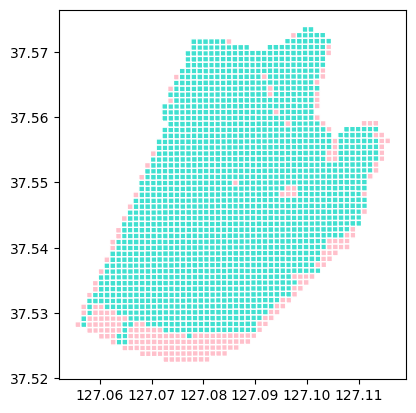

In [ ]:
import matplotlib.pyplot as plt
import geopandas as gpd

#핑크: 유동인구 없는데이터 , 파랑: 유동인구 있는 데이터 라벨링(시각화)
column_name = "gid"

# Define a function to assign colors based on the 'column_name' values
def get_color(value):
  if value in list(df["gid"].unique()):  # Replace 'your_specific_value'
    return 'turquoise'
  else:
    return 'pink'  # Default color for other points

# Apply the function to create a new column with color values
grid_gdf['color'] = grid_gdf[column_name].apply(get_color)

# Plot the convex hull with specific data points in turquoise
ax = grid_gdf.convex_hull.plot(color=grid_gdf['color'], edgecolor='w')
plt.show()

In [ ]:
high_slope_gdf = grid_gdf.copy()

# 주요 데이터 선택
high_slope_info = high_slope_gdf[["gid","longitude", "latitude", "color","geometry","centroid"]]
base_df = high_slope_info[['gid',	'longitude',	'latitude','geometry','centroid']]

high_slope_info.head(20)  # 상위 20개만 출력

In [ ]:
# 지도 이용해서 시각화
import folium

# 지도 중심 좌표 설정 (광진구 중심점)
map_center = [37.54, 127.08]  # 광진구 대략적인 중심 좌표 (위도, 경도)

# 기본 지도 생성
m = folium.Map(location=map_center, zoom_start=13, tiles="OpenStreetMap")

# 경사도가 높은 지역을 지도에 추가, color column 값으로 색상 설정
for _, row in high_slope_gdf.iterrows():
    centroid = row.geometry.centroid
    folium.CircleMarker(
        location=[centroid.y, centroid.x],  # (위도, 경도)
        radius=3,  # 점 크기
        color=row['color'],  # 테두리 색상을 color column 값으로 설정
        fill=True,
        fill_color=row['color'],  # 채우기 색상을 color column 값으로 설정
        fill_opacity=0.6,
        popup=f"Slope: {row['gid']}"  # 팝업에 경사도 값 표시
    ).add_to(m)

# 지도 출력
m

#데이터 병합 및 추출(격자 데이터 id 기준으로 (1586))

## 격자데이터 기준으로 시군구 및 행정동 할당

### 광진구데이터 병합

In [ ]:
# Left Join 수행
merged_df =base_df.merge(df, on='gid', how='right')
merged_df_base = merged_df[['gid',	'longitude',	'latitude','geometry','centroid']]
merged_df_base

,gid,longitude,latitude,geometry,centroid
0,다사608477,127.056911,37.528226,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",POINT (127.05691 37.52823)
1,다사608478,127.056906,37.529127,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",POINT (127.05691 37.52913)
2,다사609479,127.058032,37.530033,"POLYGON ((127.05747 37.52958, 127.05746 37.530...",POINT (127.05803 37.53003)
3,다사609480,127.058027,37.530934,"POLYGON ((127.05746 37.53048, 127.05746 37.531...",POINT (127.05803 37.53093)
4,다사609481,127.058022,37.531835,"POLYGON ((127.05746 37.53138, 127.05745 37.532...",POINT (127.05802 37.53184)
...,...,...,...,...,...
1581,다사658505,127.113368,37.553662,"POLYGON ((127.1128 37.55321, 127.1128 37.55411...",POINT (127.11337 37.55366)
1582,다사658506,127.113364,37.554564,"POLYGON ((127.1128 37.55411, 127.1128 37.55501...",POINT (127.11336 37.55456)
1583,다사658507,127.113359,37.555465,"POLYGON ((127.1128 37.55501, 127.11279 37.5559...",POINT (127.11336 37.55546)
1584,다사658508,127.113354,37.556366,"POLYGON ((127.11279 37.55591, 127.11279 37.556...",POINT (127.11335 37.55637)


### 서울시데이터

In [108]:
import pandas as pd

data = {
    "시도 코드": [11]*25,
    "시도 이름": ["서울시"]*25,
    "시군구_코드": [
        11110, 11140, 11170, 11200, 11215, 11230, 11260, 11290, 11305,
        11320, 11350, 11380, 11410, 11440, 11470, 11500, 11530, 11545,
        11560, 11590, 11620, 11650, 11680, 11710, 11740
    ],
    "시군구_이름": [
        "종로구", "중구", "용산구", "성동구", "광진구", "동대문구", "중랑구", "성북구", "강북구",
        "도봉구", "노원구", "은평구", "서대문구", "마포구", "양천구", "강서구", "구로구", "금천구",
        "영등포구", "동작구", "관악구", "서초구", "강남구", "송파구", "강동구"
    ]
}

df = pd.DataFrame(data)
df['시군구_코드'] = df['시군구_코드'].astype(str)

In [109]:
# Assuming 'df' has columns '시군구_코드' and '시군구_이름', and 'filtered_df' has a 'SECT_CD' column.

# Create a mapping from '시군구_코드' to '시군구_이름'
mapping = df.set_index('시군구_코드')['시군구_이름']

# Apply the mapping to the 'SECT_CD' column of filtered_df
filtered_df['시군구명'] = filtered_df['SECT_CD'].map(mapping)


In [110]:
mapping

시군구_코드
11110     종로구
11140      중구
11170     용산구
11200     성동구
11215     광진구
11230    동대문구
11260     중랑구
11290     성북구
11305     강북구
11320     도봉구
11350     노원구
11380     은평구
11410    서대문구
11440     마포구
11470     양천구
11500     강서구
11530     구로구
11545     금천구
11560    영등포구
11590     동작구
11620     관악구
11650     서초구
11680     강남구
11710     송파구
11740     강동구
Name: 시군구_이름, dtype: object

In [148]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, box

# 1. 📍 100x100 격자 데이터 로드 (CSV 또는 DataFrame)
# 격자 데이터를 GeoDataFrame으로 변환 (점 기반)
filtered_df = filtered_df.to_crs(epsg=4326)
grid_centroids = gpd.GeoDataFrame(filtered_df, geometry="centroid", crs="EPSG:4326")

# 2. 🌍 광진구 행정구역 데이터 로드 (GeoJSON 또는 Shapefile)
districts = gpd.read_file("서울_행정동_경계_2017.geojson")  # 광진구 행정동 폴리곤 데이터

# 3. 🏷️ 격자에 행정구역 라벨링 (Spatial Join 사용)
grid_labeled = gpd.sjoin(grid_centroids, districts, how="left", predicate="within")

# 4. 📝 결과 저장 (CSV & GeoJSON)
grid_labeled.to_csv("labeled_grid.csv", index=False)
# grid_labeled.to_file("labeled_grid.geojson", driver="GeoJSON")

print("✔️ 행정구역 라벨링 완료! labeled_grid.csv 확인")

✔️ 행정구역 라벨링 완료! labeled_grid.csv 확인


In [125]:
districts

,adm_cd,adm_nm,geometry
0,1101053,서울특별시 종로구 사직동,"POLYGON ((126.97689 37.57565, 126.97703 37.569..."
1,1101054,서울특별시 종로구 삼청동,"POLYGON ((126.98269 37.59507, 126.98337 37.594..."
2,1101055,서울특별시 종로구 부암동,"POLYGON ((126.97585 37.59656, 126.97359 37.593..."
3,1101056,서울특별시 종로구 평창동,"POLYGON ((126.97507 37.63139, 126.97649 37.630..."
4,1101057,서울특별시 종로구 무악동,"POLYGON ((126.96067 37.5808, 126.96281 37.5794..."
...,...,...,...
419,1125070,서울특별시 강동구 둔촌1동,"POLYGON ((127.1458 37.52199, 127.14564 37.5216..."
420,1125071,서울특별시 강동구 둔촌2동,"POLYGON ((127.15355 37.534, 127.15357 37.53102..."
421,1125072,서울특별시 강동구 암사1동,"POLYGON ((127.14447 37.55477, 127.14319 37.554..."
422,1125073,서울특별시 강동구 천호2동,"POLYGON ((127.13458 37.54712, 127.13115 37.542..."


In [151]:
grid_labeled.rename(columns={'SPO_NO_CD': 'gid'}, inplace=True)


In [150]:


# 데이터프레임 생성
광진구_라벨= pd.read_csv('서울시_행정동코드_행안부_통계청_매핑_2017.csv',encoding='cp949')
광진구_라벨 = 광진구_라벨[1:]
광진구_라벨 = 광진구_라벨.rename(columns={'통계청행정동코드':'adm_cd'})
광진구_라벨

,adm_cd,행자부행정동코드,시도명,시군구명,행정동명
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동
5,1101057,11110570,서울,종로구,무악동
...,...,...,...,...,...
420,1125070,11740690,서울,강동구,둔촌1동
421,1125071,11740700,서울,강동구,둔촌2동
422,1125072,11740570,서울,강동구,암사1동
423,1125073,11740610,서울,강동구,천호2동


In [ ]:
# Left Join 수행
merged_base_name =grid_labeled.merge(광진구_라벨[['adm_cd','행자부행정동코드','시군구명','행정동명']], on='adm_cd', how='left')
merged_base_name


In [159]:
# 📌 1. 광진구 행정동 데이터 필터링
gwangjin_districts = merged_base_name[merged_base_name["시군구명_x"] == merged_base_name["시군구명_y"]].copy()


In [160]:
gwangjin_districts

,gid,SECT_CD,geometry,centroid,longitude,latitude,시군구명_x,index_right,adm_cd,adm_nm,행자부행정동코드,시군구명_y,행정동명
1,다사521534,11110,"POLYGON ((126.95752 37.57874, 126.95751 37.579...",POINT (126.95808 37.57919),126.958079,37.579191,종로구,4.0,1101057,서울특별시 종로구 무악동,11110570,종로구,무악동
2,다사531549,11110,"POLYGON ((126.96874 37.59231, 126.96874 37.593...",POINT (126.96931 37.59276),126.969308,37.592762,종로구,15.0,1101072,서울특별시 종로구 청운효자동,11110515,종로구,청운효자동
3,다사532580,11110,"POLYGON ((126.96968 37.62025, 126.96967 37.621...",POINT (126.97024 37.62071),126.970242,37.620707,종로구,3.0,1101056,서울특별시 종로구 평창동,11110560,종로구,평창동
4,다사554541,11110,"POLYGON ((126.99485 37.58521, 126.99484 37.586...",POINT (126.99541 37.58567),126.995409,37.585665,종로구,16.0,1101073,서울특별시 종로구 혜화동,11110650,종로구,혜화동
6,다사570519,11140,"POLYGON ((127.0131 37.56546, 127.01309 37.5663...",POINT (127.01366 37.56591),127.013659,37.565912,중구,27.0,1102069,서울특별시 중구 신당동,11140615,중구,신당동
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64670,다사679453,11710,"POLYGON ((127.13681 37.50642, 127.1368 37.5073...",POINT (127.13737 37.50687),127.137370,37.506868,송파구,388.0,1124060,서울특별시 송파구 오금동,11710570,송파구,오금동
64671,다사684431,11710,"POLYGON ((127.14256 37.4866, 127.14255 37.4875...",POINT (127.14312 37.48706),127.143122,37.487055,송파구,405.0,1124082,서울특별시 송파구 위례동,11710647,송파구,위례동
64672,다사691432,11710,"POLYGON ((127.15047 37.48753, 127.15047 37.488...",POINT (127.15104 37.48798),127.151035,37.487980,송파구,405.0,1124082,서울특별시 송파구 위례동,11710647,송파구,위례동
64673,다사673498,11740,"POLYGON ((127.12982 37.54695, 127.12981 37.547...",POINT (127.13038 37.54741),127.130381,37.547407,강동구,422.0,1125073,서울특별시 강동구 천호2동,11740610,강동구,천호2동


In [ ]:
#광진구에서 벗어난 지점 가장 가까운 광진구 행정구역으로 할당
import geopandas as gpd
from shapely.ops import nearest_points
from shapely.geometry import Point

# 📌 1. 광진구 행정동 데이터 필터링
gwangjin_districts = merged_base_name[merged_base_name["시군구명_x"] == merged_base_name["시군구명_y"]].copy()


# 📌 3. 광진구가 아닌 격자 찾기
non_gwangjin = merged_base_name[merged_base_name["시군구명_x"] != merged_base_name["시군구명_y"]].copy()

# 📌 4. 최근접 행정동 찾기 함수
def find_nearest_dong(point):
    """ 특정 격자의 중심점과 가장 가까운 광진구 행정동 찾기 """
    nearest_geom = nearest_points(point, gwangjin_districts.geometry.unary_union)[1]
    nearest_dong = gwangjin_districts[gwangjin_districts.geometry == nearest_geom]["행정동명"].values[0]
    return nearest_dong

# 📌 5. 광진구가 아닌 데이터에 최근접 행정동 및 시군구명 할당
non_gwangjin = non_gwangjin.copy()
non_gwangjin["행정동명"] = non_gwangjin.geometry.centroid.apply(find_nearest_dong)
# non_gwangjin["시군구명"] = "광진구"  # 시군구명을 "광진구"로 통일

# 📌 6. 기존 데이터와 병합하여 새로운 DataFrame 생성
updated_grid_gdf = merged_base_name.copy()
updated_grid_gdf.loc[non_gwangjin.index, ["행정동명", "시군구명"]] = non_gwangjin[["행정동명", "시군구명"]]

# 📌 7. 결과 확인
updated_grid_gdf.head()


<ipython-input-37-e845146878c6>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  non_gwangjin["행정동명"] = non_gwangjin.geometry.centroid.apply(find_nearest_dong)
<ipython-input-37-e845146878c6>:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearest_geom = nearest_points(point, gwangjin_districts.geometry.unary_union)[1]
<ipython-input-37-e845146878c6>:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearest_geom = nearest_points(point, gwangjin_districts.geometry.unary_union)[1]
<ipython-input-37-e845146878c6>:15: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  nearest_geom = nearest_points(point, gwangjin_districts.geometry.unary_union)[1]
<ipython-input-37-e845146878c6>:15: De

,gid,longitude,latitude,geometry,centroid,adm_cd,행자부행정동코드,시군구명,행정동명
0,다사608477,127.056911,37.528226,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",POINT (127.05691 37.52823),1123078,11680565,광진구,자양4동
1,다사608478,127.056906,37.529127,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",POINT (127.05691 37.52913),1105067,11215847,광진구,자양4동
2,다사609479,127.058032,37.530033,"POLYGON ((127.05747 37.52958, 127.05746 37.530...",POINT (127.05803 37.53003),1105067,11215847,광진구,자양4동
3,다사609480,127.058027,37.530934,"POLYGON ((127.05746 37.53048, 127.05746 37.531...",POINT (127.05803 37.53093),1105067,11215847,광진구,자양4동
4,다사609481,127.058022,37.531835,"POLYGON ((127.05746 37.53138, 127.05745 37.532...",POINT (127.05802 37.53184),1104067,11200670,광진구,자양4동


## 광진구 탐색 자료 병합 및 추출


### 유흥주점


In [4]:
import pandas as pd
df = pd.read_csv('labeled_grid.csv',encoding='utf-8')

In [ ]:
df = df[['SPO_NO_CD','longitude','latitude','시군구명']]

In [39]:
# 주야간보호 = pd.read_csv('/content/drive/MyDrive/광진구청 공모전/searched_data/서울특별시 광진구_주야간보호시설 현황_20250311.csv',encoding='cp949')
유흥주점 = pd.read_csv('서울시 유흥주점영업 인허가 정보.csv',encoding='cp949')
유치원 = pd.read_csv('일반 현황_20242.csv',encoding='cp949')
단란주점 = pd.read_csv('서울시 단란주점영업 인허가 정보.csv',encoding='cp949')


In [30]:
유흥주점.columns

Index(['개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자', '영업상태코드', '영업상태명', '상세영업상태코드',
       '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', '전화번호', '소재지면적',
       '소재지우편번호', '지번주소', '도로명주소', '도로명우편번호', '사업장명', '최종수정일자', '데이터갱신구분',
       '데이터갱신일자', '업태구분명', '좌표정보(X)', '좌표정보(Y)', '위생업태명', '남성종사자수', '여성종사자수',
       '영업장주변구분명', '등급구분명', '급수시설구분명', '총인원', '본사종업원수', '공장사무직종업원수',
       '공장판매직종업원수', '공장생산직종업원수', '건물소유구분명', '보증액', '월세액', '다중이용업소여부', '시설총규모',
       '전통업소지정번호', '전통업소주된음식', '홈페이지'],
      dtype='object')

In [41]:
유흥주점 = 유흥주점.loc[유흥주점['상세영업상태명']=='영업',['사업장명','지번주소','좌표정보(X)', '좌표정보(Y)','시설총규모']]
유흥주점

,사업장명,지번주소,좌표정보(X),좌표정보(Y),시설총규모
0,오스카,서울특별시 강남구 역삼동 688-6 지하1층,203516.591236,444995.018910,NaN
1,부킹,서울특별시 도봉구 창동 13,204317.264907,461224.014057,NaN
2,사라있네,서울특별시 강남구 대치동 890-38 지하1층,204647.421250,444687.506114,NaN
3,루키,서울특별시 송파구 가락동 99-1 지하1층,210491.688890,443508.221246,NaN
4,승리노래바,서울특별시 강서구 화곡동 903-10 2층,186437.390022,447472.670707,NaN
...,...,...,...,...,...
4777,준코뮤직타운,서울특별시 강동구 길동 459-2번지 중부빌딩 3층 301호,212111.336831,448059.842031,288.99
4778,몰디브,서울특별시 강동구 길동 387-7,212139.681877,448366.810705,96.33
4836,수,서울특별시 강동구 길동 449-1 (2층),212022.198149,448182.326670,148.60
4837,제니아노래광장,서울특별시 강동구 천호동 550-7,211266.478732,448675.520340,97.05


In [43]:
유흥주점 = 유흥주점.dropna(subset=['지번주소']).reset_index(drop=True)


In [ ]:
import re
def clean_address(addr):
    # 괄호 안 제거 (예: (2층))
    addr = re.sub(r'\([^)]*\)', '', addr)
    # '지하', '지상', '층' 정보 제거
    addr = re.sub(r'(지하|지상)?\d+층', '', addr)
    # '번지', '호', '빌딩' 등 추가 정보 제거 (선택적으로 수행)
    addr = re.sub(r'\s?(빌딩).*', '', addr)
    # 중복된 공백 제거
    addr = re.sub(r'\s+', ' ', addr).strip()
    return addr

# 적용
유흥주점['지번주소'] = 유흥주점['지번주소'].apply(clean_address)

In [46]:
유흥주점['지번주소']

0           서울특별시 강남구 역삼동 688-6
1               서울특별시 도봉구 창동 13
2          서울특별시 강남구 대치동 890-38
3            서울특별시 송파구 가락동 99-1
4          서울특별시 강서구 화곡동 903-10
                 ...           
1744    서울특별시 강동구 길동 459-2번지 중부
1745         서울특별시 강동구 길동 387-7
1746         서울특별시 강동구 길동 449-1
1747        서울특별시 강동구 천호동 550-7
1748         서울특별시 강동구 길동 450번지
Name: 지번주소, Length: 1749, dtype: object

In [ ]:
import requests
import pandas as pd

# 📌 1. 카카오 REST API 키 입력 (개인 키로 변경 필요)
KAKAO_API_KEY = ""

# 📌 2. 주소 → 좌표 변환 함수
def get_lat_lon(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:  # 요청 성공
        result = response.json()
        if result["documents"]:
            lat = float(result["documents"][0]["y"])  # 위도
            lon = float(result["documents"][0]["x"])  # 경도
            return lat, lon
    return None, None  # 실패 시 (None 반환)


유흥주점 = pd.DataFrame(유흥주점)

# 📌 4. 주소 → 위도·경도 변환 적용
유흥주점["latitude"], 유흥주점["longitude"] = zip(*유흥주점["지번주소"].apply(get_lat_lon))

# 📌 5. 결과 출력
print(유흥주점)


         사업장명                     지번주소        좌표정보(X)        좌표정보(Y)   시설총규모  \
0         오스카      서울특별시 강남구 역삼동 688-6  203516.591236  444995.018910     NaN   
1          부킹          서울특별시 도봉구 창동 13  204317.264907  461224.014057     NaN   
2        사라있네     서울특별시 강남구 대치동 890-38  204647.421250  444687.506114     NaN   
3          루키       서울특별시 송파구 가락동 99-1  210491.688890  443508.221246     NaN   
4       승리노래바     서울특별시 강서구 화곡동 903-10  186437.390022  447472.670707     NaN   
...       ...                      ...            ...            ...     ...   
1744   준코뮤직타운  서울특별시 강동구 길동 459-2번지 중부  212111.336831  448059.842031  288.99   
1745      몰디브       서울특별시 강동구 길동 387-7  212139.681877  448366.810705   96.33   
1746        수       서울특별시 강동구 길동 449-1  212022.198149  448182.326670  148.60   
1747  제니아노래광장      서울특별시 강동구 천호동 550-7  211266.478732  448675.520340   97.05   
1748       첼로       서울특별시 강동구 길동 450번지  212011.067809  448166.552514  147.35   

       latitude   longitude  
0     37.

In [49]:
유흥주점 = 유흥주점[['사업장명','지번주소','latitude','longitude']]

In [52]:
유흥주점.to_csv('서울시_유흥주점_전처리.csv',encoding='cp949',index=False)

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 📌 1. 격자 데이터 (Polygon) 불러오기
grid_gdf = gpd.GeoDataFrame(merged_base_name, geometry="geometry", crs="EPSG:4326")  # 위도·경도 기준 좌표계


# 📌 3. 사업장 데이터 GeoDataFrame 변환
bars_gdf = gpd.GeoDataFrame(
    유흥주점,
    geometry=[Point(lon, lat) for lon, lat in zip(유흥주점["longitude"], 유흥주점["latitude"])],
    crs="EPSG:4326"
)

# 📌 4. 사업장을 포함하는 격자 찾기 (Spatial Join)
joined = gpd.sjoin(bars_gdf, grid_gdf, how="left", predicate="within")

# 📌 5. 격자별 유흥주점 개수 계산
bar_counts = joined.groupby("gid").size().reset_index(name="유흥주점갯수")
bar_counts
# 📌 6. 기존 격자 데이터에 유흥주점 개수 병합
grid_gdf = grid_gdf.merge(bar_counts, on="gid", how="left").fillna(0)

# 📌 7. 최종 결과 확인
print(grid_gdf[["gid", "유흥주점갯수"]].isnull)


<bound method DataFrame.isnull of            gid  유흥주점갯수
0     다사608477     0.0
1     다사608478     0.0
2     다사609479     0.0
3     다사609480     0.0
4     다사609481     0.0
...        ...     ...
1581  다사658505     0.0
1582  다사658506     0.0
1583  다사658507     0.0
1584  다사658508     0.0
1585  다사658510     0.0

[1586 rows x 2 columns]>


In [ ]:
updated_grid_gdf

,gid,longitude,latitude,geometry,centroid,adm_cd,행자부행정동코드,시군구명,행정동명
0,다사608477,127.056911,37.528226,"POLYGON ((127.05635 37.52777, 127.05634 37.528...",POINT (127.05691 37.52823),1123078,11680565,광진구,자양4동
1,다사608478,127.056906,37.529127,"POLYGON ((127.05634 37.52867, 127.05634 37.529...",POINT (127.05691 37.52913),1105067,11215847,광진구,자양4동
2,다사609479,127.058032,37.530033,"POLYGON ((127.05747 37.52958, 127.05746 37.530...",POINT (127.05803 37.53003),1105067,11215847,광진구,자양4동
3,다사609480,127.058027,37.530934,"POLYGON ((127.05746 37.53048, 127.05746 37.531...",POINT (127.05803 37.53093),1105067,11215847,광진구,자양4동
4,다사609481,127.058022,37.531835,"POLYGON ((127.05746 37.53138, 127.05745 37.532...",POINT (127.05802 37.53184),1104067,11200670,광진구,자양4동
...,...,...,...,...,...,...,...,...,...
1581,다사658505,127.113368,37.553662,"POLYGON ((127.1128 37.55321, 127.1128 37.55411...",POINT (127.11337 37.55366),1105063,11215810,광진구,광장동
1582,다사658506,127.113364,37.554564,"POLYGON ((127.1128 37.55411, 127.1128 37.55501...",POINT (127.11336 37.55456),1105063,11215810,광진구,광장동
1583,다사658507,127.113359,37.555465,"POLYGON ((127.1128 37.55501, 127.11279 37.5559...",POINT (127.11336 37.55546),1105063,11215810,광진구,광장동
1584,다사658508,127.113354,37.556366,"POLYGON ((127.11279 37.55591, 127.11279 37.556...",POINT (127.11335 37.55637),1105063,11215810,광진구,광장동


### 단란주점

In [58]:
단란주점

,사업장명,지번주소,좌표정보(X),좌표정보(Y),시설총규모
0,팬덤라이브,서울특별시 중랑구 묵동 163-1 2층,206806.082718,457062.242123,NaN
1,파티파티,서울특별시 은평구 응암동 592-72 B1층,192370.058325,454042.088300,NaN
2,홀짝7080,서울특별시 강동구 길동 385-10 영무 엘리아트,212029.761028,448403.837813,NaN
3,시크릿 노래주점,서울특별시 성동구 성수동2가 350,204474.754282,448401.981844,NaN
4,무학성,서울특별시 성동구 성수동2가 230-9 우신빌딩,205186.921416,448361.655899,NaN
...,...,...,...,...,...
11214,뭉스밸리(라이프앤라이브바),서울특별시 강동구 천호동 452 산경2 빌딩,211279.672086,448363.390640,123.20
11215,철부지,서울특별시 강동구 길동 415-13 강동 큐브 2차,211963.942242,448273.205059,126.31
11216,가랑비Ⅱ,서울특별시 강동구 길동 414-5 골드클래스,212126.200127,448339.048387,111.88
11217,로데오포차7080,서울특별시 강동구 천호동 453-7번지,211220.108222,448503.534642,138.25


In [ ]:
단란주점 = 단란주점.loc[단란주점['상세영업상태명']=='영업',['사업장명','지번주소','좌표정보(X)', '좌표정보(Y)','시설총규모']]
단란주점

In [63]:
단란주점 = 단란주점.dropna(subset=['지번주소']).reset_index(drop=True)



In [65]:
import re
def clean_address(addr):
    # 괄호 안 제거 (예: (2층))
    addr = re.sub(r'\([^)]*\)', '', addr)
    # '지하', '지상', '층' 정보 제거
    addr = re.sub(r'(지하|지상)?\d+층', '', addr)
    # '번지', '호', '빌딩' 등 추가 정보 제거 (선택적으로 수행)
    addr = re.sub(r'\s?(빌딩).*', '', addr)
    # 중복된 공백 제거
    addr = re.sub(r'\s+', ' ', addr).strip()
    return addr

# 적용
단란주점['지번주소'] = 단란주점['지번주소'].apply(clean_address)

In [ ]:
단란주점['지번주소'] = 단란주점['지번주소'].str.replace('번지','')
list1 = [i.split(',')[0].split('지하')[0].strip() for i in 단란주점['지번주소']]
단란주점['지번주소'] = list1
단란주점['지번주소']

0                 서울특별시 중랑구 묵동 163-1
1             서울특별시 은평구 응암동 592-72 B
2        서울특별시 강동구 길동 385-10 영무 엘리아트
3                서울특별시 성동구 성수동2가 350
4           서울특별시 성동구 성수동2가 230-9 우신
                    ...             
1931           서울특별시 강동구 천호동 452 산경2
1932    서울특별시 강동구 길동 415-13 강동 큐브 2차
1933        서울특별시 강동구 길동 414-5 골드클래스
1934           서울특별시 강동구 천호동 453-7번지
1935            서울특별시 강동구 성내동 244-14
Name: 지번주소, Length: 1936, dtype: object

In [ ]:
import requests
import pandas as pd

# 📌 1. 카카오 REST API 키 입력 (개인 키로 변경 필요)
KAKAO_API_KEY = ""

# 📌 2. 주소 → 좌표 변환 함수
def get_lat_lon(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:  # 요청 성공
        result = response.json()
        if result["documents"]:
            lat = float(result["documents"][0]["y"])  # 위도
            lon = float(result["documents"][0]["x"])  # 경도
            return lat, lon
    return None, None  # 실패 시 (None 반환)


단란주점 = pd.DataFrame(단란주점)

# 📌 4. 주소 → 위도·경도 변환 적용
단란주점["latitude"], 단란주점["longitude"] = zip(*단란주점["지번주소"].apply(get_lat_lon))

# 📌 5. 결과 출력
print(단란주점)


                사업장명                          지번주소        좌표정보(X)  \
0              팬덤라이브            서울특별시 중랑구 묵동 163-1  206806.082718   
1               파티파티        서울특별시 은평구 응암동 592-72 B  192370.058325   
2             홀짝7080   서울특별시 강동구 길동 385-10 영무 엘리아트  212029.761028   
3           시크릿 노래주점           서울특별시 성동구 성수동2가 350  204474.754282   
4                무학성      서울특별시 성동구 성수동2가 230-9 우신  205186.921416   
...              ...                           ...            ...   
1931  뭉스밸리(라이프앤라이브바)         서울특별시 강동구 천호동 452 산경2  211279.672086   
1932             철부지  서울특별시 강동구 길동 415-13 강동 큐브 2차  211963.942242   
1933            가랑비Ⅱ      서울특별시 강동구 길동 414-5 골드클래스  212126.200127   
1934       로데오포차7080         서울특별시 강동구 천호동 453-7번지  211220.108222   
1935       별이 빛나는 밤에          서울특별시 강동구 성내동 244-14  211960.925532   

            좌표정보(Y)   시설총규모   latitude   longitude  
0     457062.242123     NaN  37.615873  127.077876  
1     454042.088300     NaN  37.588655  126.914399  
2     448403

In [69]:
단란주점 = 단란주점[['사업장명','지번주소','latitude','longitude']]

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 📌 1. 격자 데이터 (Polygon) 불러오기
grid_gdf = gpd.GeoDataFrame(grid_gdf, geometry="geometry", crs="EPSG:4326")  # 위도·경도 기준 좌표계


# 📌 3. 사업장 데이터 GeoDataFrame 변환
bars_gdf = gpd.GeoDataFrame(
    단란주점,
    geometry=[Point(lon, lat) for lon, lat in zip(단란주점["longitude"], 단란주점["latitude"])],
    crs="EPSG:4326"
)

# 📌 4. 사업장을 포함하는 격자 찾기 (Spatial Join)
joined = gpd.sjoin(bars_gdf, grid_gdf, how="left", predicate="within")

# 📌 5. 격자별 단란주점 개수 계산
bar_counts = joined.groupby("gid").size().reset_index(name="단란주점갯수")
bar_counts
# 📌 6. 기존 격자 데이터에 단란주점 개수 병합
grid_gdf = grid_gdf.merge(bar_counts, on="gid", how="left").fillna(0)

# 📌 7. 최종 결과 확인
print(grid_gdf[["gid", "단란주점갯수"]].isnull)


<bound method DataFrame.isnull of            gid  단란주점갯수
0     다사608477     0.0
1     다사608478     0.0
2     다사609479     0.0
3     다사609480     0.0
4     다사609481     0.0
...        ...     ...
1581  다사658505     0.0
1582  다사658506     0.0
1583  다사658507     0.0
1584  다사658508     0.0
1585  다사658510     0.0

[1586 rows x 2 columns]>


### 유치원 전처리

In [72]:
유치원.columns

Index(['교육청명', '교육지원청명', '유치원명', '설립유형', '대표자명', '원장명', '설립일', '개원일', '주소',
       '전화번호', '팩스번호', '홈페이지', '만3세학급수', '만4세학급수', '만5세학급수', '혼합학급수', '특수학급수',
       '인가총정원수', '3세모집정원수', '4세모집정원수', '5세모집정원수', '혼합모집정원수', '특수학급모집정원수',
       '만3세원아수', '만4세원아수', '만5세원아수', '혼합원아수', '특수원아수'],
      dtype='object')

In [73]:
유치원_df  = 유치원[['유치원명', '설립유형','주소', '만3세학급수', '만4세학급수', '만5세학급수', '혼합학급수', '특수학급수',
       '인가총정원수', '3세모집정원수', '4세모집정원수', '5세모집정원수', '혼합모집정원수', '특수학급모집정원수',
       '만3세원아수', '만4세원아수', '만5세원아수', '혼합원아수', '특수원아수']]
유치원_df = 유치원_df.fillna(0)
유치원_df

,유치원명,설립유형,주소,만3세학급수,만4세학급수,만5세학급수,혼합학급수,특수학급수,인가총정원수,3세모집정원수,4세모집정원수,5세모집정원수,혼합모집정원수,특수학급모집정원수,만3세원아수,만4세원아수,만5세원아수,혼합원아수,특수원아수
0,강남유정유치원,사립(사인),서울특별시 강남구 광평로34길 17,7,6,5,0,0,429,139,148,142,0,0,139,148,142,0,0
1,구룡유치원,사립(사인),서울특별시 서초구 논현로5길 31-11,1,2,1,0,0,120,20,48,28,0,0,20,41,28,0,0
2,남부유치원,사립(사인),서울특별시 강남구 언주로 123,0,0,0,2,0,80,0,0,0,80,0,0,0,0,78,0
3,도곡렉슬유치원,사립(사인),서울특별시 강남구 선릉로 221,0,0,0,8,0,240,0,0,0,200,0,0,0,0,200,0
4,돌샘유치원,사립(사인),서울특별시 강남구 개포로 516,2,2,2,0,0,260,46,48,50,0,0,45,48,48,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,충신유치원,사립(사인),서울특별시 용산구 이촌로71길 14,3,2,2,0,0,240,66,56,60,0,0,49,52,57,0,0
730,한가람유치원,사립(사인),서울특별시 용산구 이촌로89길 50,1,1,1,0,0,90,30,30,30,0,0,16,15,11,0,0
731,한아름유치원,사립(사인),서울특별시 종로구 혜화로6가길 34,0,0,0,3,0,68,0,0,0,42,0,0,0,0,34,0
732,한일유치원,사립(사인),서울특별시 중구 퇴계로88다길 5,1,2,1,0,0,95,30,42,23,0,0,14,29,22,0,0


In [74]:
# 전체 원아수 계산
유치원_df["전체원아수"] = 유치원_df["만3세원아수"] + 유치원_df["만4세원아수"] + 유치원_df["만5세원아수"] + 유치원_df["혼합원아수"] + 유치원_df["특수원아수"]
# 전체 학급수 계산
유치원_df["전체학급수"] = 유치원_df["만3세학급수"] + 유치원_df["만4세학급수"] + 유치원_df["만5세학급수"] + 유치원_df["혼합학급수"] + 유치원_df["특수학급수"]


In [75]:
유치원_df

,유치원명,설립유형,주소,만3세학급수,만4세학급수,만5세학급수,혼합학급수,특수학급수,인가총정원수,3세모집정원수,...,5세모집정원수,혼합모집정원수,특수학급모집정원수,만3세원아수,만4세원아수,만5세원아수,혼합원아수,특수원아수,전체원아수,전체학급수
0,강남유정유치원,사립(사인),서울특별시 강남구 광평로34길 17,7,6,5,0,0,429,139,...,142,0,0,139,148,142,0,0,429,18
1,구룡유치원,사립(사인),서울특별시 서초구 논현로5길 31-11,1,2,1,0,0,120,20,...,28,0,0,20,41,28,0,0,89,4
2,남부유치원,사립(사인),서울특별시 강남구 언주로 123,0,0,0,2,0,80,0,...,0,80,0,0,0,0,78,0,78,2
3,도곡렉슬유치원,사립(사인),서울특별시 강남구 선릉로 221,0,0,0,8,0,240,0,...,0,200,0,0,0,0,200,0,200,8
4,돌샘유치원,사립(사인),서울특별시 강남구 개포로 516,2,2,2,0,0,260,46,...,50,0,0,45,48,48,0,0,141,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,충신유치원,사립(사인),서울특별시 용산구 이촌로71길 14,3,2,2,0,0,240,66,...,60,0,0,49,52,57,0,0,158,7
730,한가람유치원,사립(사인),서울특별시 용산구 이촌로89길 50,1,1,1,0,0,90,30,...,30,0,0,16,15,11,0,0,42,3
731,한아름유치원,사립(사인),서울특별시 종로구 혜화로6가길 34,0,0,0,3,0,68,0,...,0,42,0,0,0,0,34,0,34,3
732,한일유치원,사립(사인),서울특별시 중구 퇴계로88다길 5,1,2,1,0,0,95,30,...,23,0,0,14,29,22,0,0,65,4


In [ ]:
유치원_df['설립법인유형'] = 유치원_df['설립유형'].str.split('(').str[1]
유치원_df['설립법인유형'] = 유치원_df['설립법인유형'].str.replace(')','')
유치원_df['설립유형'] = 유치원_df['설립유형'].str.split('(').str[0]
유치원_df['설립유형']

0      사립
1      사립
2      사립
3      사립
4      사립
       ..
729    사립
730    사립
731    사립
732    사립
733    사립
Name: 설립유형, Length: 734, dtype: object

In [77]:
# 설립법인유형을 두 번째 컬럼으로 이동
설립법인유형 = 유치원_df.pop("설립법인유형")
유치원_df.insert(2, "설립법인유형", 설립법인유형)


In [78]:
유치원_df.rename(columns={'주소':'지번주소','설립유형':'유치원_설립유형','설립법인유형':'유치원_설립법인','전체유아수':'유치원_전체유아수','전체학급수':'유치원_전체학급수'},inplace=True)

In [80]:
import requests
import pandas as pd

# 📌 1. 카카오 REST API 키 입력 (개인 키로 변경 필요)
KAKAO_API_KEY = "b70aae56225c3ea3d1361f70256c5964"

# 📌 2. 주소 → 좌표 변환 함수
def get_lat_lon(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:  # 요청 성공
        result = response.json()
        if result["documents"]:
            lat = float(result["documents"][0]["y"])  # 위도
            lon = float(result["documents"][0]["x"])  # 경도
            return lat, lon
    return None, None  # 실패 시 (None 반환)


유치원_df = pd.DataFrame(유치원_df)

# 📌 4. 주소 → 위도·경도 변환 적용
유치원_df["latitude"], 유치원_df["longitude"] = zip(*유치원_df["지번주소"].apply(get_lat_lon))

# 📌 5. 결과 출력
print(유치원_df)

        유치원명 유치원_설립유형 유치원_설립법인                   지번주소  만3세학급수  만4세학급수  만5세학급수  \
0    강남유정유치원       사립       사인    서울특별시 강남구 광평로34길 17       7       6       5   
1      구룡유치원       사립       사인  서울특별시 서초구 논현로5길 31-11       1       2       1   
2      남부유치원       사립       사인      서울특별시 강남구 언주로 123       0       0       0   
3    도곡렉슬유치원       사립       사인      서울특별시 강남구 선릉로 221       0       0       0   
4      돌샘유치원       사립       사인      서울특별시 강남구 개포로 516       2       2       2   
..       ...      ...      ...                    ...     ...     ...     ...   
729    충신유치원       사립       사인    서울특별시 용산구 이촌로71길 14       3       2       2   
730   한가람유치원       사립       사인    서울특별시 용산구 이촌로89길 50       1       1       1   
731   한아름유치원       사립       사인    서울특별시 종로구 혜화로6가길 34       0       0       0   
732    한일유치원       사립       사인     서울특별시 중구 퇴계로88다길 5       1       2       1   
733    혜화유치원       사립       법인     서울특별시 종로구 창경궁로 296       0       0       0   

     혼합학급수  특수학급수  인가총정원수  

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# 📌 1. 격자 데이터 (Polygon) 불러오기
grid_gdf = gpd.GeoDataFrame(grid_gdf, geometry="geometry", crs="EPSG:4326")  # 위도·경도 기준 좌표계


# 📌 3. 사업장 데이터 GeoDataFrame 변환
bars_gdf = gpd.GeoDataFrame(
    유치원_df,
    geometry=[Point(lon, lat) for lon, lat in zip(유치원_df["longitude"], 유치원_df["latitude"])],
    crs="EPSG:4326"
)

# 📌 4. 사업장을 포함하는 격자 찾기 (Spatial Join)
joined = gpd.sjoin(bars_gdf, grid_gdf, how="left", predicate="within")
len(joined['gid'].unique())
# # 📌 5. 격자별 유치원_df 개수 계산
# bar_counts = joined.groupby("gid").size().reset_index(name="유치원_df갯수")
# bar_counts
# # 📌 6. 기존 격자 데이터에 유치원_df 개수 병합
# grid_gdf = grid_gdf.merge(bar_counts, on="gid", how="left").fillna(0)

# # 📌 7. 최종 결과 확인
# print(grid_gdf[["gid", "유치원_df갯수"]].isnull)

38

In [ ]:
joined_df = joined[['유치원_설립유형', '유치원_설립법인','유치원_전체유아수','유치원_전체학급수','gid']]

In [ ]:
joined_df

,유치원_설립유형,유치원_설립법인,유치원_전체유아수,유치원_전체학급수,gid
0,사립,법인,121.0,6.0,다사637483
1,사립,법인,42.0,3.0,다사632482
2,사립,사인,33.0,2.0,다사632480
3,사립,사인,172.0,8.0,다사645489
4,공립,병설,55.0,4.0,다사629486
5,사립,사인,136.0,6.0,다사647492
6,사립,법인,281.0,12.0,다사627498
7,사립,사인,62.0,3.0,다사644505
8,사립,사인,19.0,1.0,다사633494
9,사립,사인,68.0,3.0,다사631510


In [ ]:
grid_gdf_유치원포함 =grid_gdf.merge(joined_df, on='gid', how='left')

In [ ]:
grid_gdf_유치원포함[['유치원_설립유형', '유치원_설립법인','유치원_전체유아수', '유치원_전체학급수']].fillna('유치원없음')

,유치원_설립유형,유치원_설립법인,유치원_전체유아수,유치원_전체학급수
0,유치원없음,유치원없음,유치원없음,유치원없음
1,유치원없음,유치원없음,유치원없음,유치원없음
2,유치원없음,유치원없음,유치원없음,유치원없음
3,유치원없음,유치원없음,유치원없음,유치원없음
4,유치원없음,유치원없음,유치원없음,유치원없음
...,...,...,...,...
1581,유치원없음,유치원없음,유치원없음,유치원없음
1582,유치원없음,유치원없음,유치원없음,유치원없음
1583,유치원없음,유치원없음,유치원없음,유치원없음
1584,유치원없음,유치원없음,유치원없음,유치원없음


In [ ]:
# Replace this:
# grid_gdf_유치원포함.fillna(['유치원_설립유형', '유치원_설립법인','유치원_전체유아수', '유치원_전체학급수'],'유치원없음')

# With this:
grid_gdf_유치원포함[['유치원_설립유형', '유치원_설립법인']] = grid_gdf_유치원포함[['유치원_설립유형', '유치원_설립법인']].fillna('유치원없음')
grid_gdf_유치원포함[['유치원_전체유아수', '유치원_전체학급수']] = grid_gdf_유치원포함[['유치원_전체유아수', '유치원_전체학급수']].fillna(0)

In [88]:
df2= df[:100]

In [89]:
df2

,SPO_NO_CD,longitude,latitude,시군구명
0,다사514578,126.949859,37.618812,종로구
1,다사521534,126.958079,37.579191,종로구
2,다사531549,126.969308,37.592762,종로구
3,다사532580,126.970242,37.620707,종로구
4,다사554541,126.995409,37.585665,종로구
...,...,...,...,...
95,다사487403,126.920488,37.460935,관악구
96,다사506423,126.941837,37.479065,관악구
97,다사516384,126.953403,37.443966,관악구
98,다사533415,126.972425,37.471995,관악구


In [90]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# --------------------------------------------------------------------
# ✅ 두 지점 간의 거리 계산 함수 (하버사인 공식 사용, 단위: 미터)
# --------------------------------------------------------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # 지구 반지름 (단위: meter)

    # 위도와 경도를 라디안으로 변환
    phi1, phi2 = radians(lat1), radians(lat2)
    dphi = radians(lat2 - lat1)
    dlambda = radians(lon2 - lon1)

    # 하버사인 공식 계산
    a = sin(dphi / 2)**2 + cos(phi1) * cos(phi2) * sin(dlambda / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c  # 거리(m) 반환

# --------------------------------------------------------------------
# ✅ 기준 위치에서 500m 내 술집 수와 가장 가까운 거리 계산하는 함수
# --------------------------------------------------------------------
def 분석_500m_주변_술집(df_기준, df_술집, 반경=500):
    results = []  # 결과 저장할 리스트

    # 기준 위치를 하나씩 반복
    for i, 기준 in df_기준.iterrows():
        # 기준 위치의 위도, 경도 추출
        lat0, lon0 = 기준['latitude'], 기준['longitude']
        
        # 기준 위치와 모든 술집 간 거리 계산 (행 단위 apply)
        distances = df_술집.apply(
            lambda row: haversine(lat0, lon0, row['latitude'], row['longitude']),
            axis=1
        )

        # 500m 이내 거리만 필터링
        within_range = distances[distances <= 반경]

        # 가장 가까운 거리 (빈 경우 NaN 처리)
        min_dist = distances.min() if not distances.empty else np.nan

        # 결과 저장
        results.append({
            'SPO_NO_CD': 기준['SPO_NO_CD'],                          # 기준 위치 고유 ID
            '500m_내_술집수': within_range.count(),                  # 반경 내 술집 수
            '가장_가까운_거리(m)': round(min_dist, 2)                # 최소 거리 (소수점 2자리)
                                  if not np.isnan(min_dist) else None
        })

    # 리스트 → DataFrame 변환하여 결과 반환
    return pd.DataFrame(results)

df_결과 = 분석_500m_주변_술집(df2, 단란주점)


In [ ]:
df_결과

### 사설키즈카페 야외놀이터 전처리

In [ ]:
실내=pd.read_csv('/content/drive/MyDrive/광진구청 공모전/searched_data/KC_INFANT_PLAY_INDOOR_FCLTY_LIST_2023.csv',encoding='utf-8')
야외=pd.read_csv('/content/drive/MyDrive/광진구청 공모전/searched_data/KC_INFANT_PLAY_OTDR_FCLTY_LIST_2023.csv',encoding='utf-8')
야외.head()

In [ ]:
#필요데이터 추출
야외 = 야외.loc[야외['SIGNGU_NM']=='광진구']
실내 = 실내.loc[실내['SIGNGU_NM']=='광진구']
야외=야외[['FCLTY_NM','FCLTY_LA','FCLTY_LO','SIGNGU_NM','LEGALDONG_NM','FCLTY_ROAD_NM_ADDR']]
실내=실내[['FCLTY_NM','FCLTY_LA','FCLTY_LO','SIGNGU_NM','LEGALDONG_NM','FCLTY_ROAD_NM_ADDR']]
야외.rename(columns={'FCLTY_LA':'latitude','FCLTY_LO':'longitude'},inplace=True)
실내.rename(columns={'FCLTY_LA':'latitude','FCLTY_LO':'longitude'},inplace=True)

In [ ]:
#사설키즈카페 네이버 기준 직접조사 매핑
실내추가 = ['캘리클럽','펀노리터','클래비즈파크','점핑몬스터','더키즈프리미엄키즈카페','리틀비틀','프로맘킨더','아이점프','헬로방방','블럭고고','키즈방방','아키블럭']
주소=['서울 광진구 구의동 546-4','서울 광진구 중곡동 113-7','서울 광진구 능동 18-11','서울 광진구 구의동 671','서울 광진구 중곡동 629-6','서울 광진구 자양동 553-376','서울 광진구 자양동 227-342','서울 광진구 군자동 345-20','서울 광진구 자양동 513','서울 광진구 광장동 484','서울 광진구 중곡동 190-28','서울 광진구 자양동 653-47']

# Create a new DataFrame with the additional data
df_추가 = pd.DataFrame({'FCLTY_NM': 실내추가, 'FCLTY_ROAD_NM_ADDR': 주소})

In [ ]:
## 카카오 api  -> 주소 -> 위도경도

import requests
import pandas as pd

# 📌 1. 카카오 REST API 키 입력 (개인 키로 변경 필요)
KAKAO_API_KEY = ""

# 📌 2. 주소 → 좌표 변환 함수
def get_lat_lon(address):
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {"query": address}

    response = requests.get(url, headers=headers, params=params)
    if response.status_code == 200:  # 요청 성공
        result = response.json()
        if result["documents"]:
            lat = float(result["documents"][0]["y"])  # 위도
            lon = float(result["documents"][0]["x"])  # 경도
            return lat, lon
    return None, None  # 실패 시 (None 반환)


df_추가 = pd.DataFrame(df_추가)

# 📌 4. 주소 → 위도·경도 변환 적용
df_추가["latitude"], df_추가["longitude"] = zip(*df_추가["FCLTY_ROAD_NM_ADDR"].apply(get_lat_lon))

# 📌 5. 결과 출력
print(df_추가)